In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loader

In [ ]:
df_ny = pd.read_csv('../data/processed/ny.csv')
df_aus = pd.read_csv('../data/processed/austin.csv')
df = pd.read_csv('../data/processed/combined_data.csv')

# Display the combined DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26200 entries, 0 to 26199
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          26200 non-null  object 
 1   grid          26200 non-null  float64
 2   bathroom      26200 non-null  float64
 3   bedroom       26200 non-null  float64
 4   car           26200 non-null  float64
 5   diningroom    26200 non-null  float64
 6   livingroom    26200 non-null  float64
 7   office        26200 non-null  float64
 8   utilityroom   26200 non-null  float64
 9   waterheater   26200 non-null  float64
 10  aircomp       26200 non-null  float64
 11  kitchenArea   26200 non-null  float64
 12  washer_dryer  26200 non-null  float64
 13  other         26200 non-null  float64
 14  day           26200 non-null  object 
 15  month         26200 non-null  object 
 16  day_name      26200 non-null  object 
 17  hour          26200 non-null  int64  
 18  minute        26200 non-nu

## Fix Data Types

In [37]:
# Define a function to convert data types
def convert_data_types(df):
    # Convert 'date' column to datetime if it exists
    if 'date' in df.columns and df['date'].dtype == 'object':
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        
    if 'day' in df.columns and df['day'].dtype == 'object':
        df['day'] = pd.to_datetime(df['day'], errors='coerce')
    
    # Convert all other object columns to categorical
    for column in df.select_dtypes(include='object').columns:
        df[column] = df[column].astype('category')
    
    return df

# Define the correct order for months and days
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_of_day_order = ['Night', 'Morning', 'Afternoon', 'Evening']

# Define a function to convert data types and set categorical order
def convert_and_order_categories(df):
    # Convert 'date' column to datetime if it exists
    if 'date' in df.columns and df['date'].dtype == 'object':
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Convert categorical columns with explicit ordering
    if 'month' in df.columns:
        df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
    if 'day_name' in df.columns:
        df['day_name'] = pd.Categorical(df['day_name'], categories=day_order, ordered=True)
    if 'time_of_day' in df.columns:
        df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=time_of_day_order, ordered=True)
    
    # Convert remaining object columns to category without specific ordering
    for column in df.select_dtypes(include='object').columns:
        if column not in ['month', 'day_name', 'time_of_day']:  # Exclude already converted columns
            df[column] = df[column].astype('category')
    
    return df



In [38]:
# Apply the function to both DataFrames
df = convert_data_types(df)

df = convert_and_order_categories(df)


## Data Distribution

In [39]:
# Identify numerical and categorical columns in df
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()
cat_cols

['month', 'day_name', 'time_of_day', 'season', 'city']

### Categorical

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


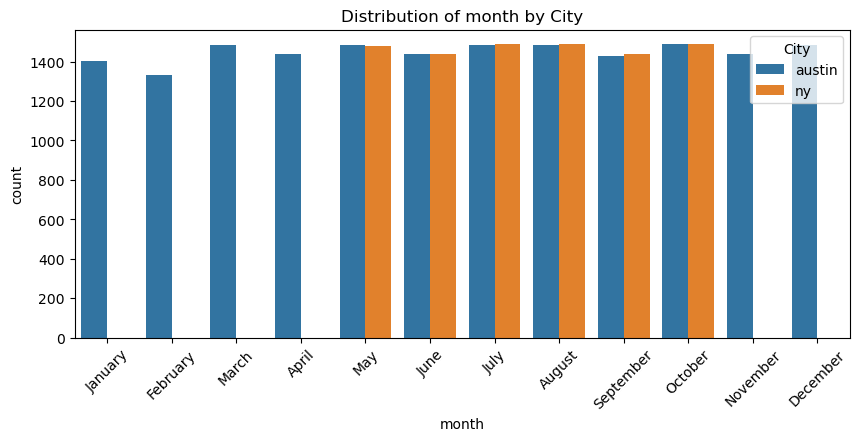

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


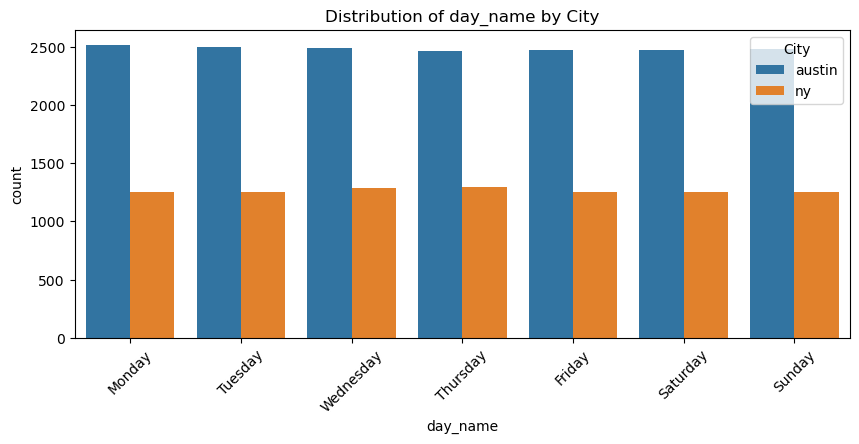

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


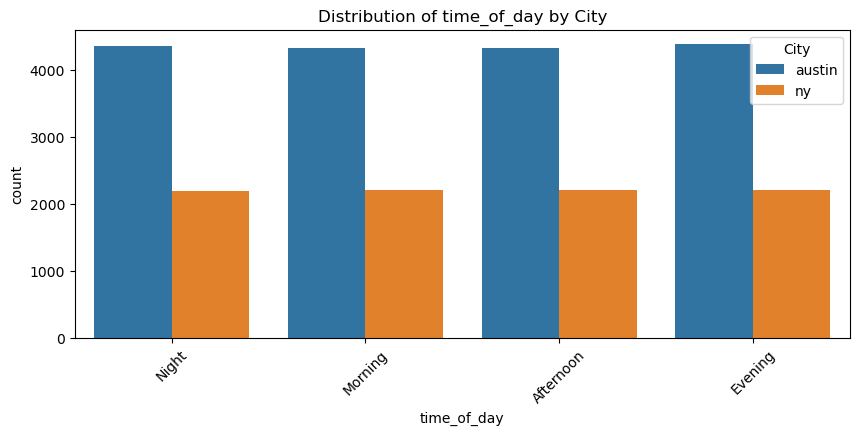

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


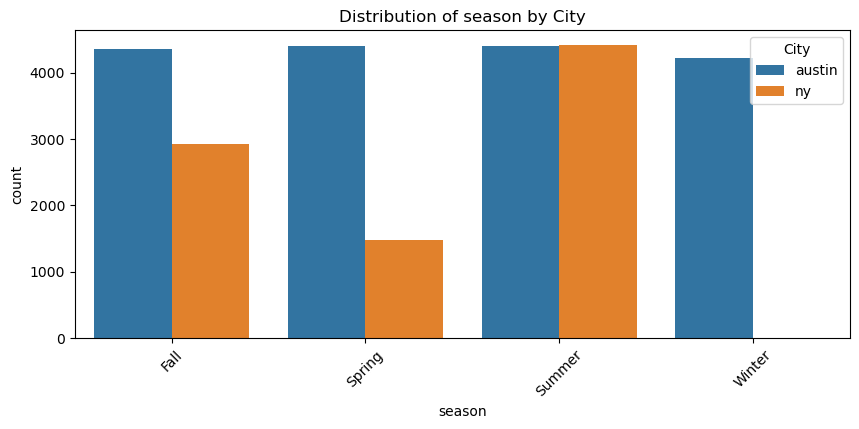

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


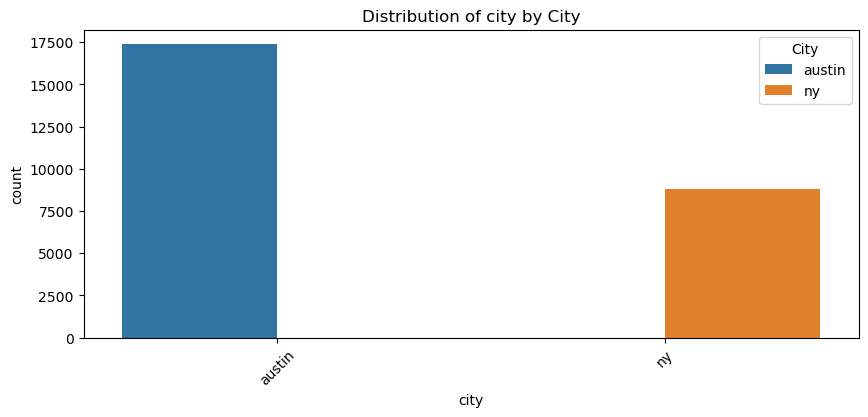

In [40]:
# Loop through each categorical column and create a count plot colored by city
for column in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df, hue='city')  # Add hue='city' to color by city
    plt.title(f'Distribution of {column} by City')
    plt.xticks(rotation=45)
    plt.legend(title='City')
    plt.show()

### Numerical

In [41]:
df.describe().round(1)

,grid,bathroom,bedroom,car,diningroom,livingroom,office,utilityroom,waterheater,aircomp,...,other,day,hour,minute,temp,dwpt,rhum,wdir,wspd,pres
count,26200.0,26200.0,26200.0,26200.0,26200.0,26200.0,26200.0,26200.0,26200.0,26200.0,...,26200.0,26200,26200.0,26200.0,26200.0,26200.0,26200.0,26200.0,26200.0,26200.0
mean,0.7,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.5,...,0.1,2018-11-12 14:21:48.091603200,11.5,15.0,21.1,13.6,65.8,177.0,8.8,1016.5
min,-2.6,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-61.8,...,-526.4,2018-01-01 00:00:00,0.0,0.0,-7.8,-16.2,9.0,1.0,0.0,987.0
25%,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.1,2018-05-19 18:00:00,5.0,0.0,15.6,8.9,51.0,120.0,5.4,1012.2
50%,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.1,2018-10-03 12:00:00,12.0,15.0,22.2,15.6,68.0,170.0,9.4,1015.5
75%,1.2,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.6,...,0.1,2019-06-17 00:00:00,18.0,30.0,26.7,20.0,82.0,250.0,11.2,1020.3
max,4.1,0.1,0.1,0.8,0.0,0.1,0.0,0.1,0.5,100.6,...,854.2,2019-10-31 00:00:00,23.0,30.0,42.8,25.7,100.0,360.0,42.5,1043.5
std,1.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,1.0,...,6.5,NaN,6.9,15.0,8.1,7.9,19.8,96.7,6.0,6.3


/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

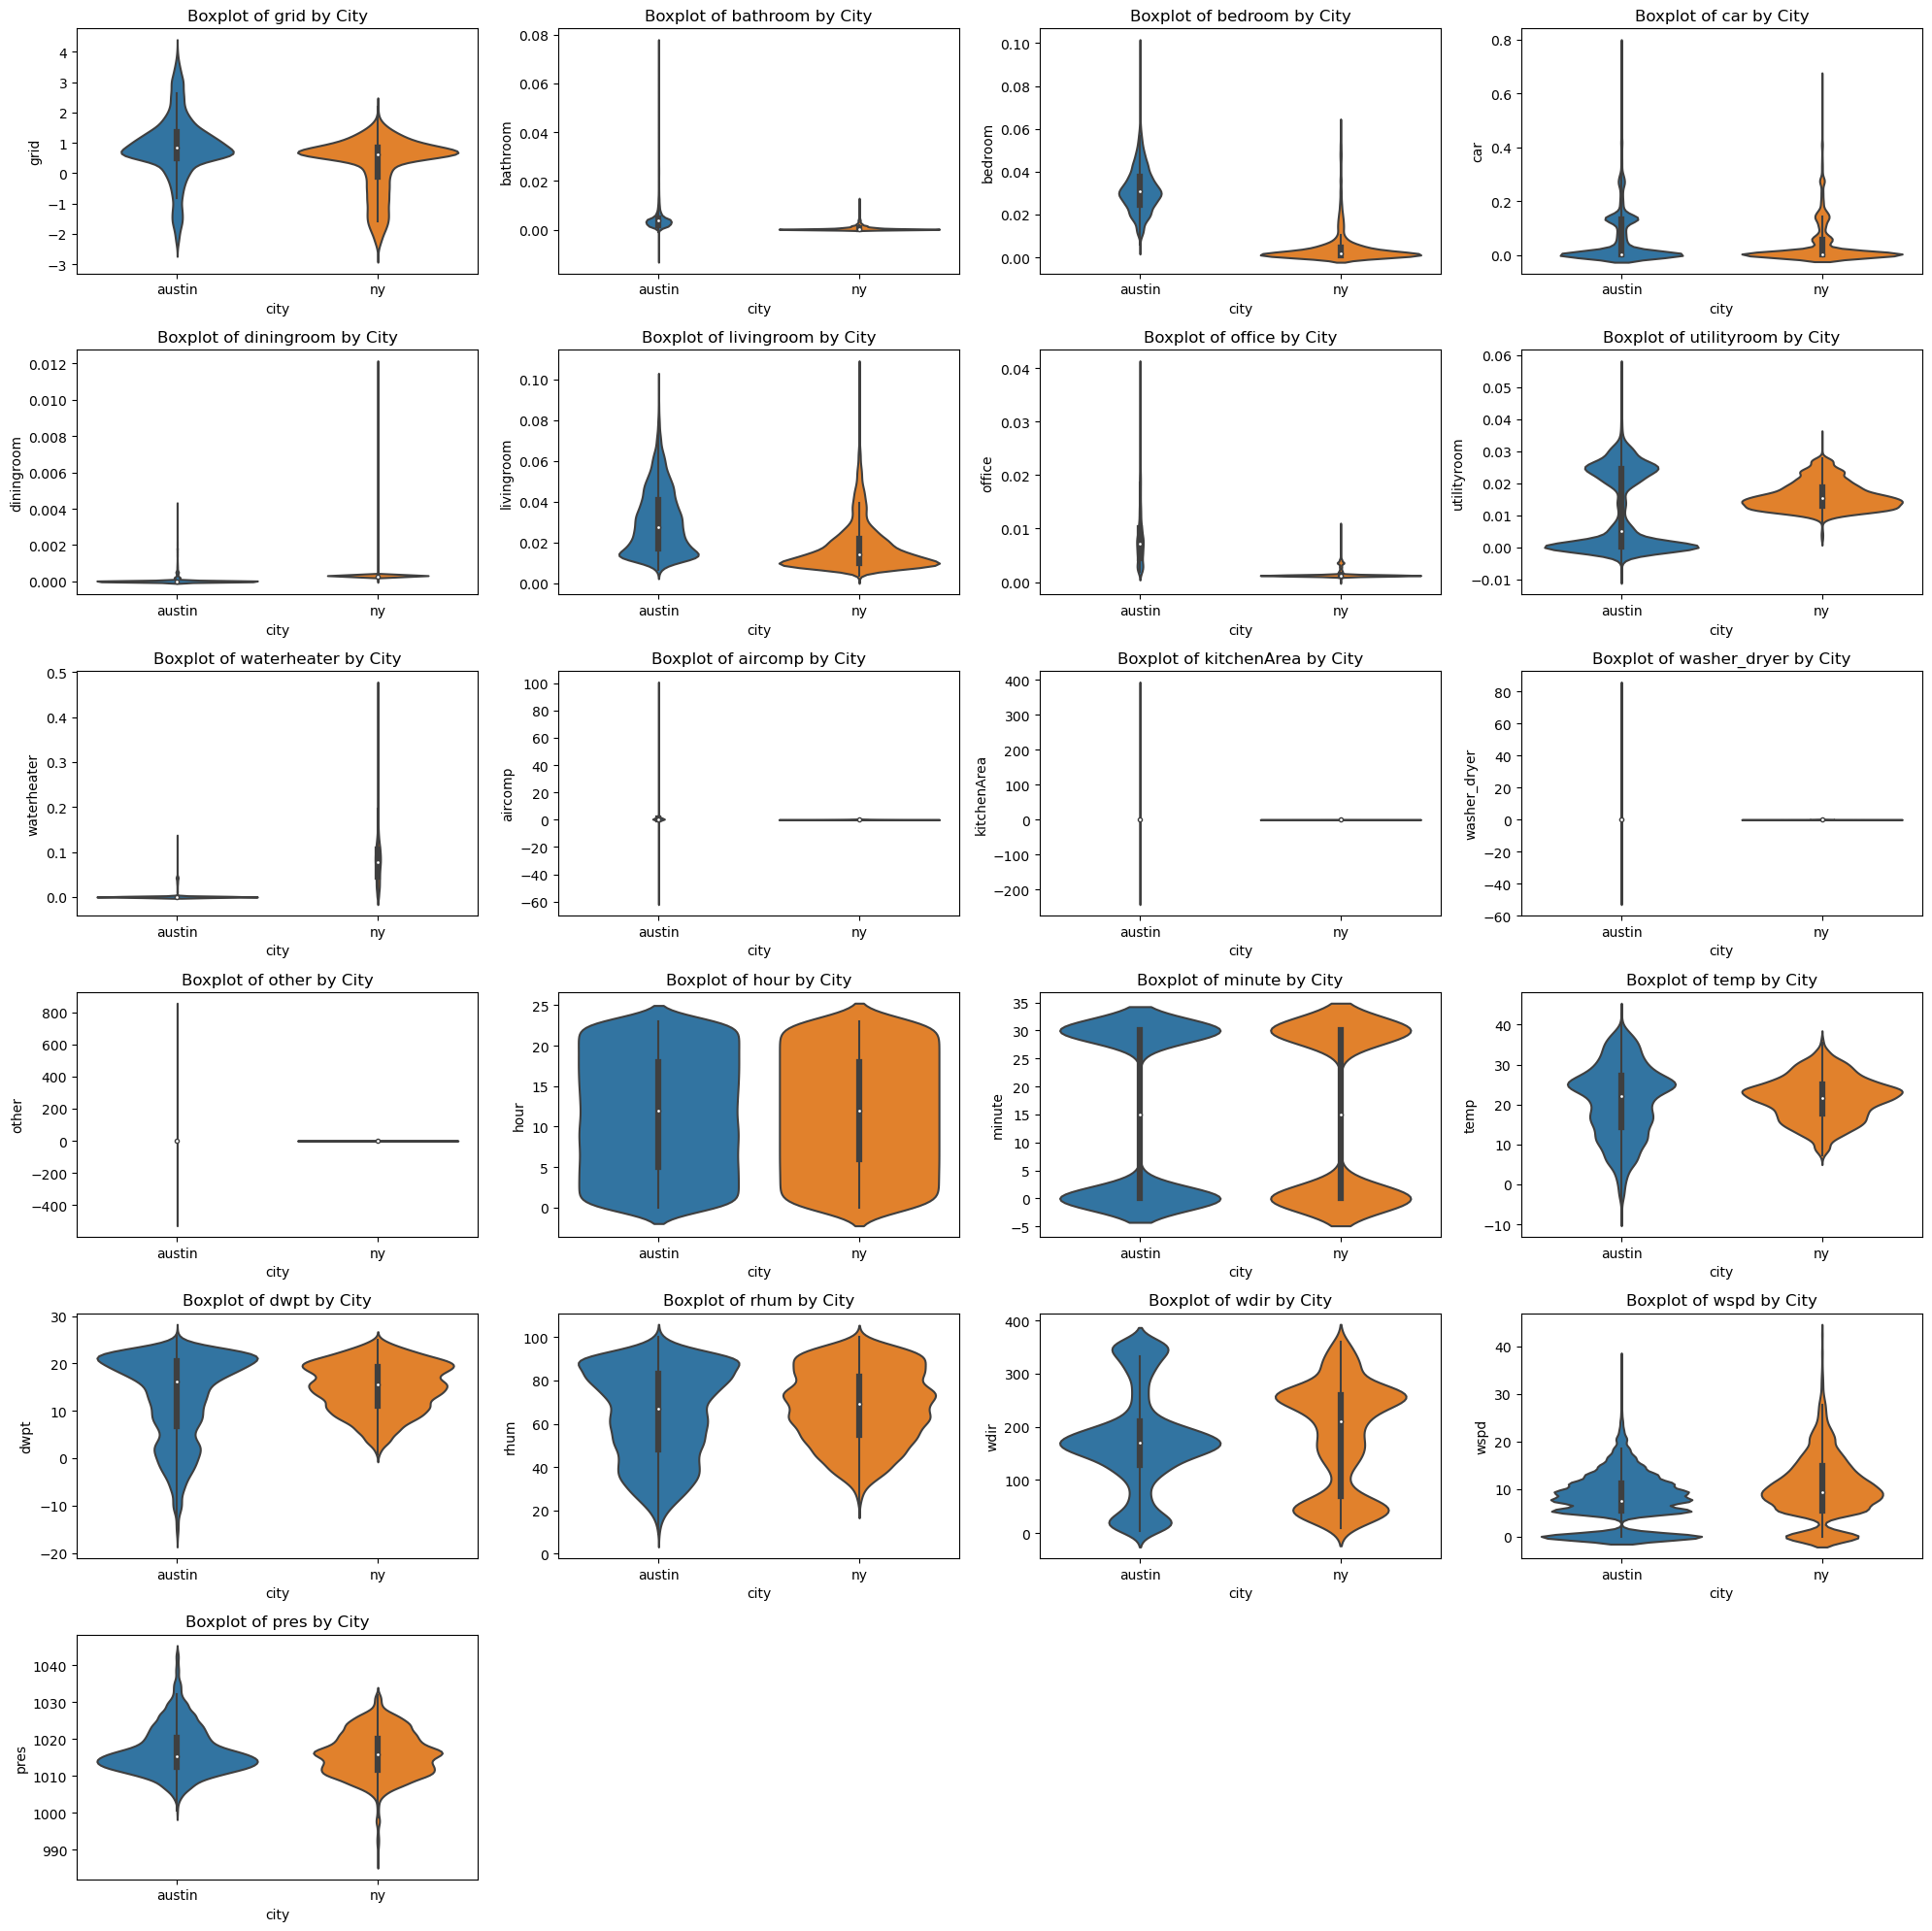

In [42]:
# Plot each numerical column with city as hue
plt.figure(figsize=(20, 20))
for i, column in enumerate(num_cols):
    plt.subplot((len(num_cols) // 4) + 1, 4, i + 1)
    sns.violinplot( x='city', y=column, data=df)  # Use 'city' as x-axis and add hue
    plt.title(f'Boxplot of {column} by City')

plt.tight_layout()
plt.show()

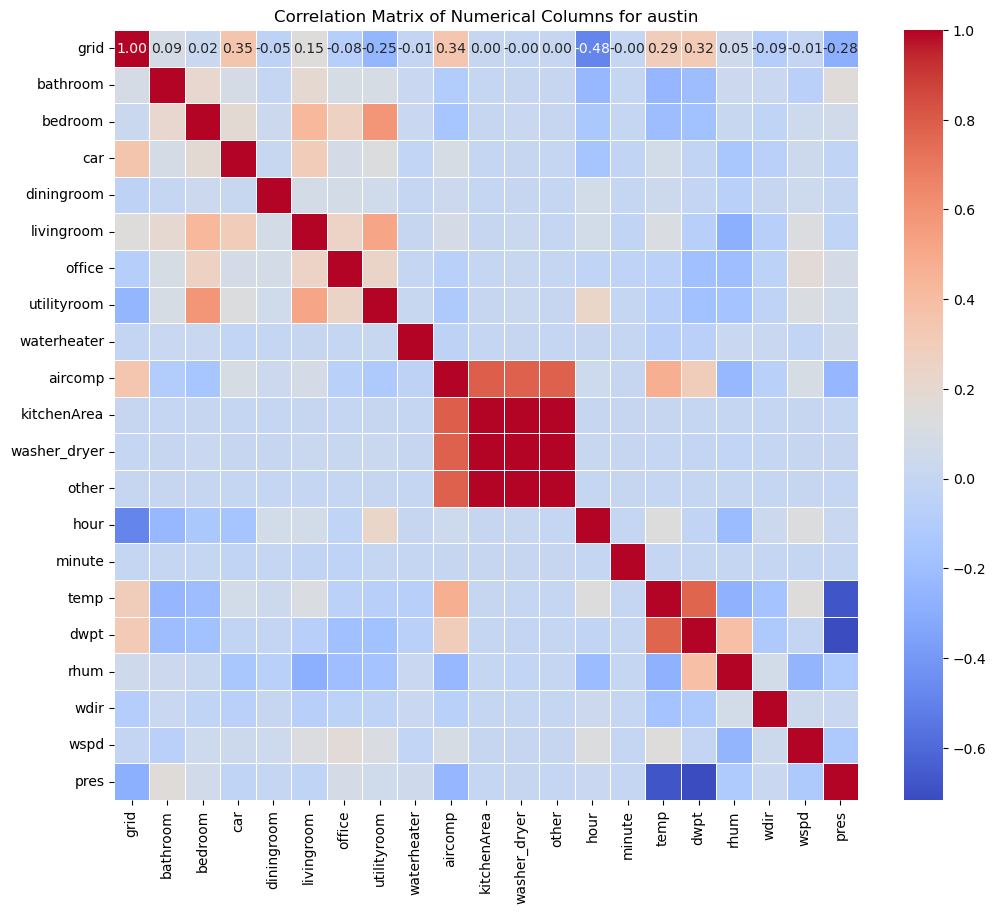

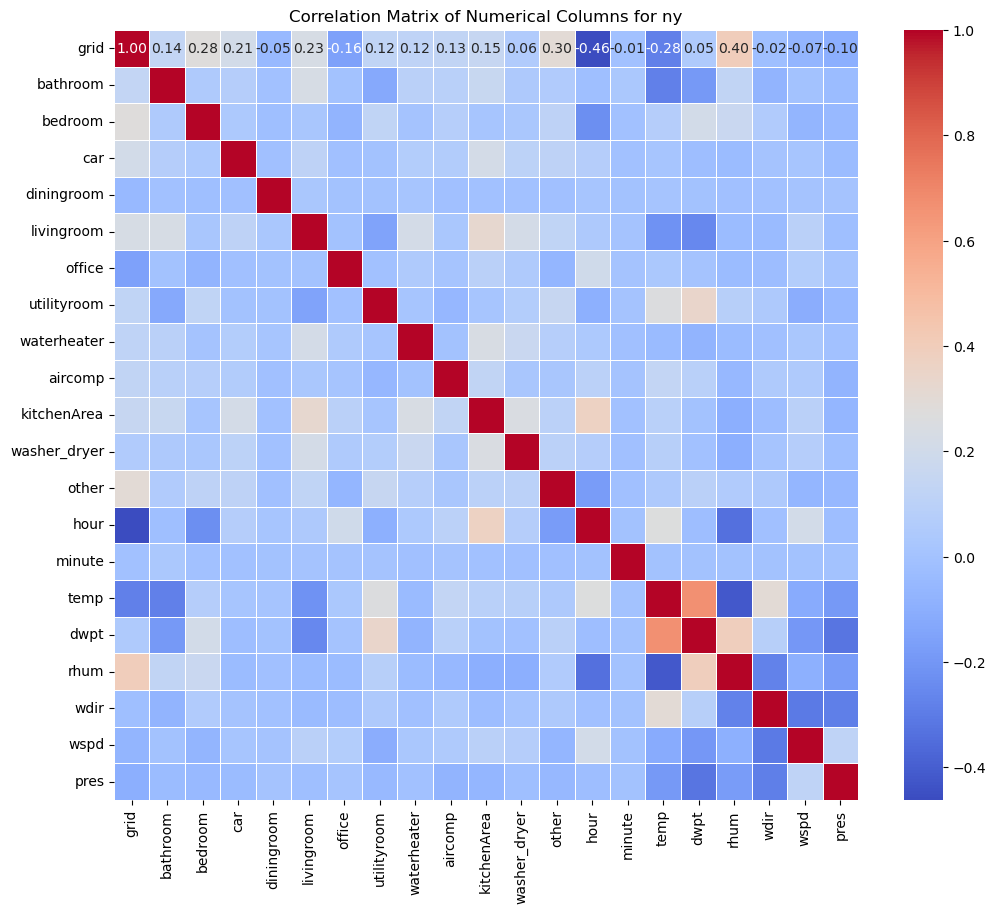

In [43]:
# Loop through each city and plot the correlation heatmap for numerical columns
for city in df['city'].unique():
    # Filter the DataFrame for the current city
    city_df = df[df['city'] == city]
    
    # Calculate the correlation matrix for numerical columns
    numerical_columns = city_df.select_dtypes(include='number').columns
    corr_matrix = city_df[numerical_columns].corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix of Numerical Columns for {city}')
    plt.show()

### Energy Trends

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


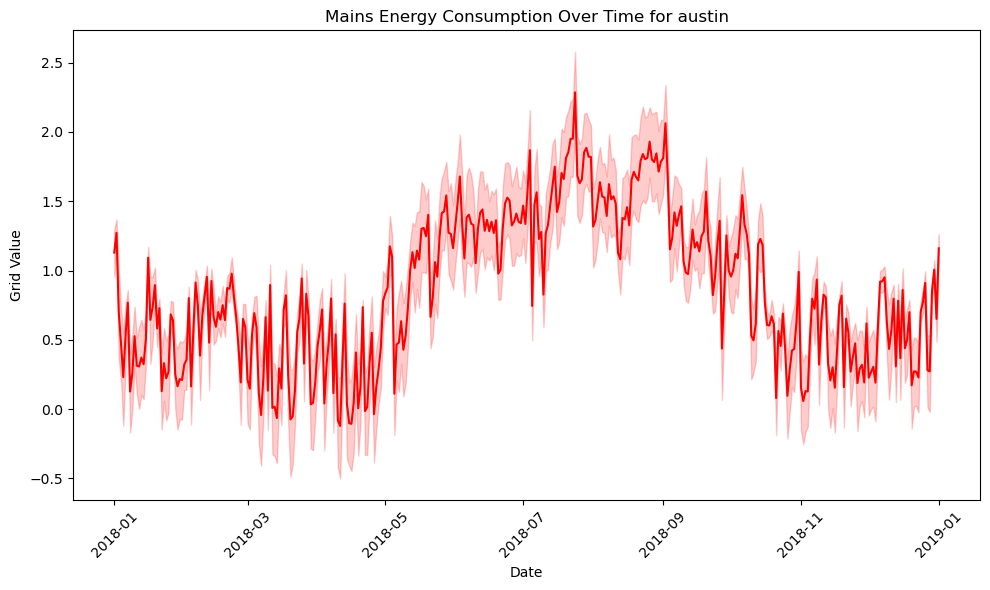

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


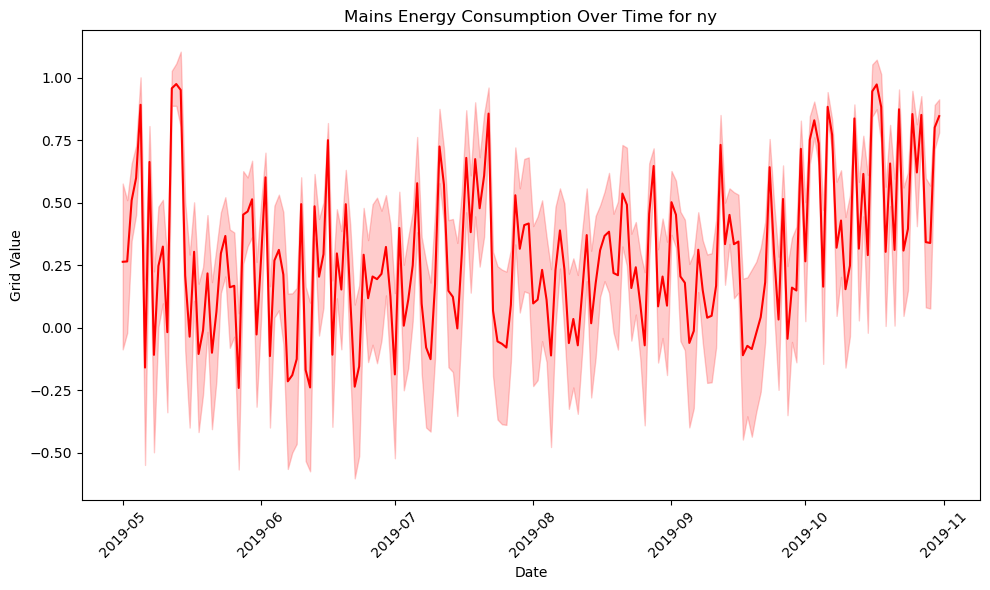

In [44]:
# Loop through each city and plot the 'grid' column over time
for city in df['city'].unique():
    # Filter the DataFrame for the current city
    city_df = df[df['city'] == city]
    
    # Plot a line chart for the 'grid' column
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='day', y='grid', data=city_df, color='red')

    # Add titles and labels
    plt.title(f'Mains Energy Consumption Over Time for {city}')
    plt.xlabel('Date')
    plt.ylabel('Grid Value')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [45]:
df.columns

Index(['date', 'grid', 'bathroom', 'bedroom', 'car', 'diningroom',
       'livingroom', 'office', 'utilityroom', 'waterheater', 'aircomp',
       'kitchenArea', 'washer_dryer', 'other', 'day', 'month', 'day_name',
       'hour', 'minute', 'time_of_day', 'is_weekend', 'temp', 'dwpt', 'rhum',
       'wdir', 'wspd', 'pres', 'season', 'is_holiday', 'city'],
      dtype='object')

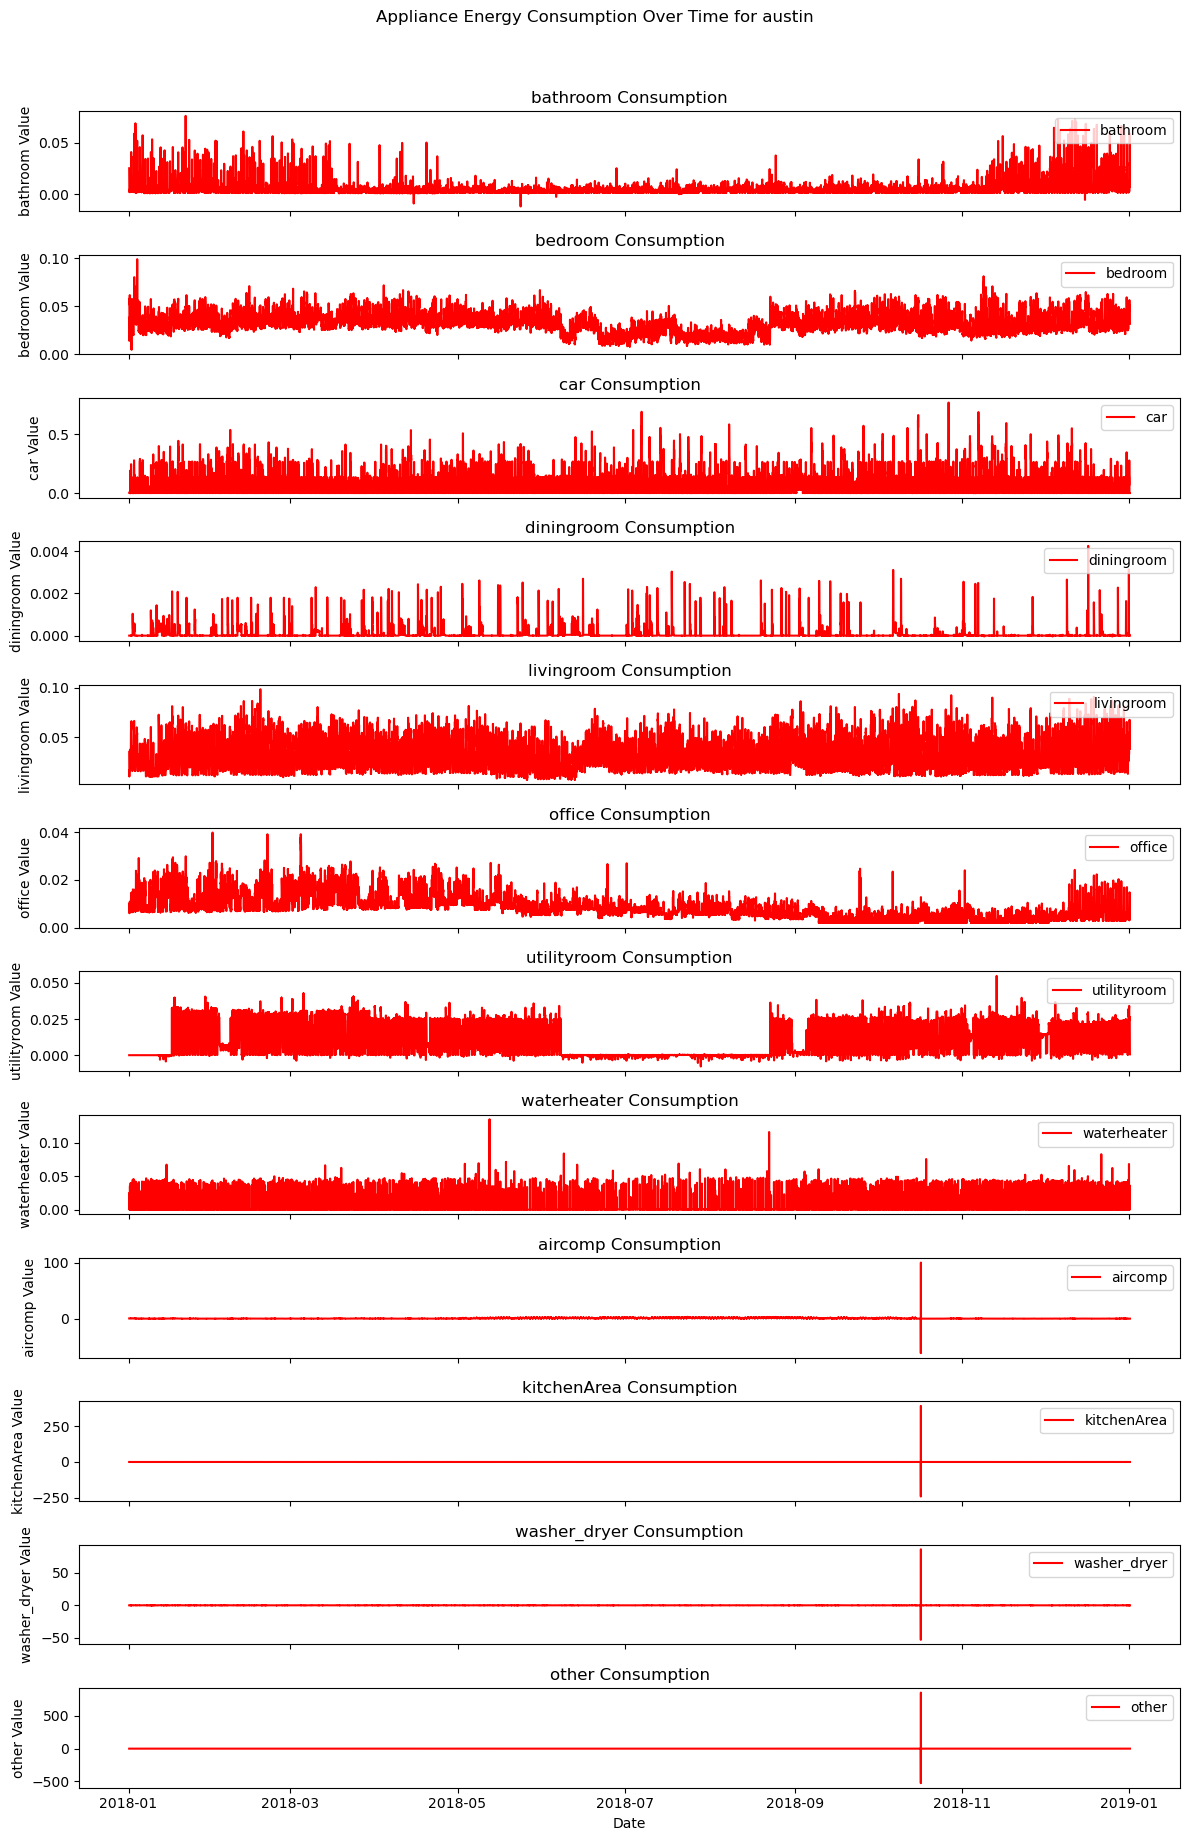

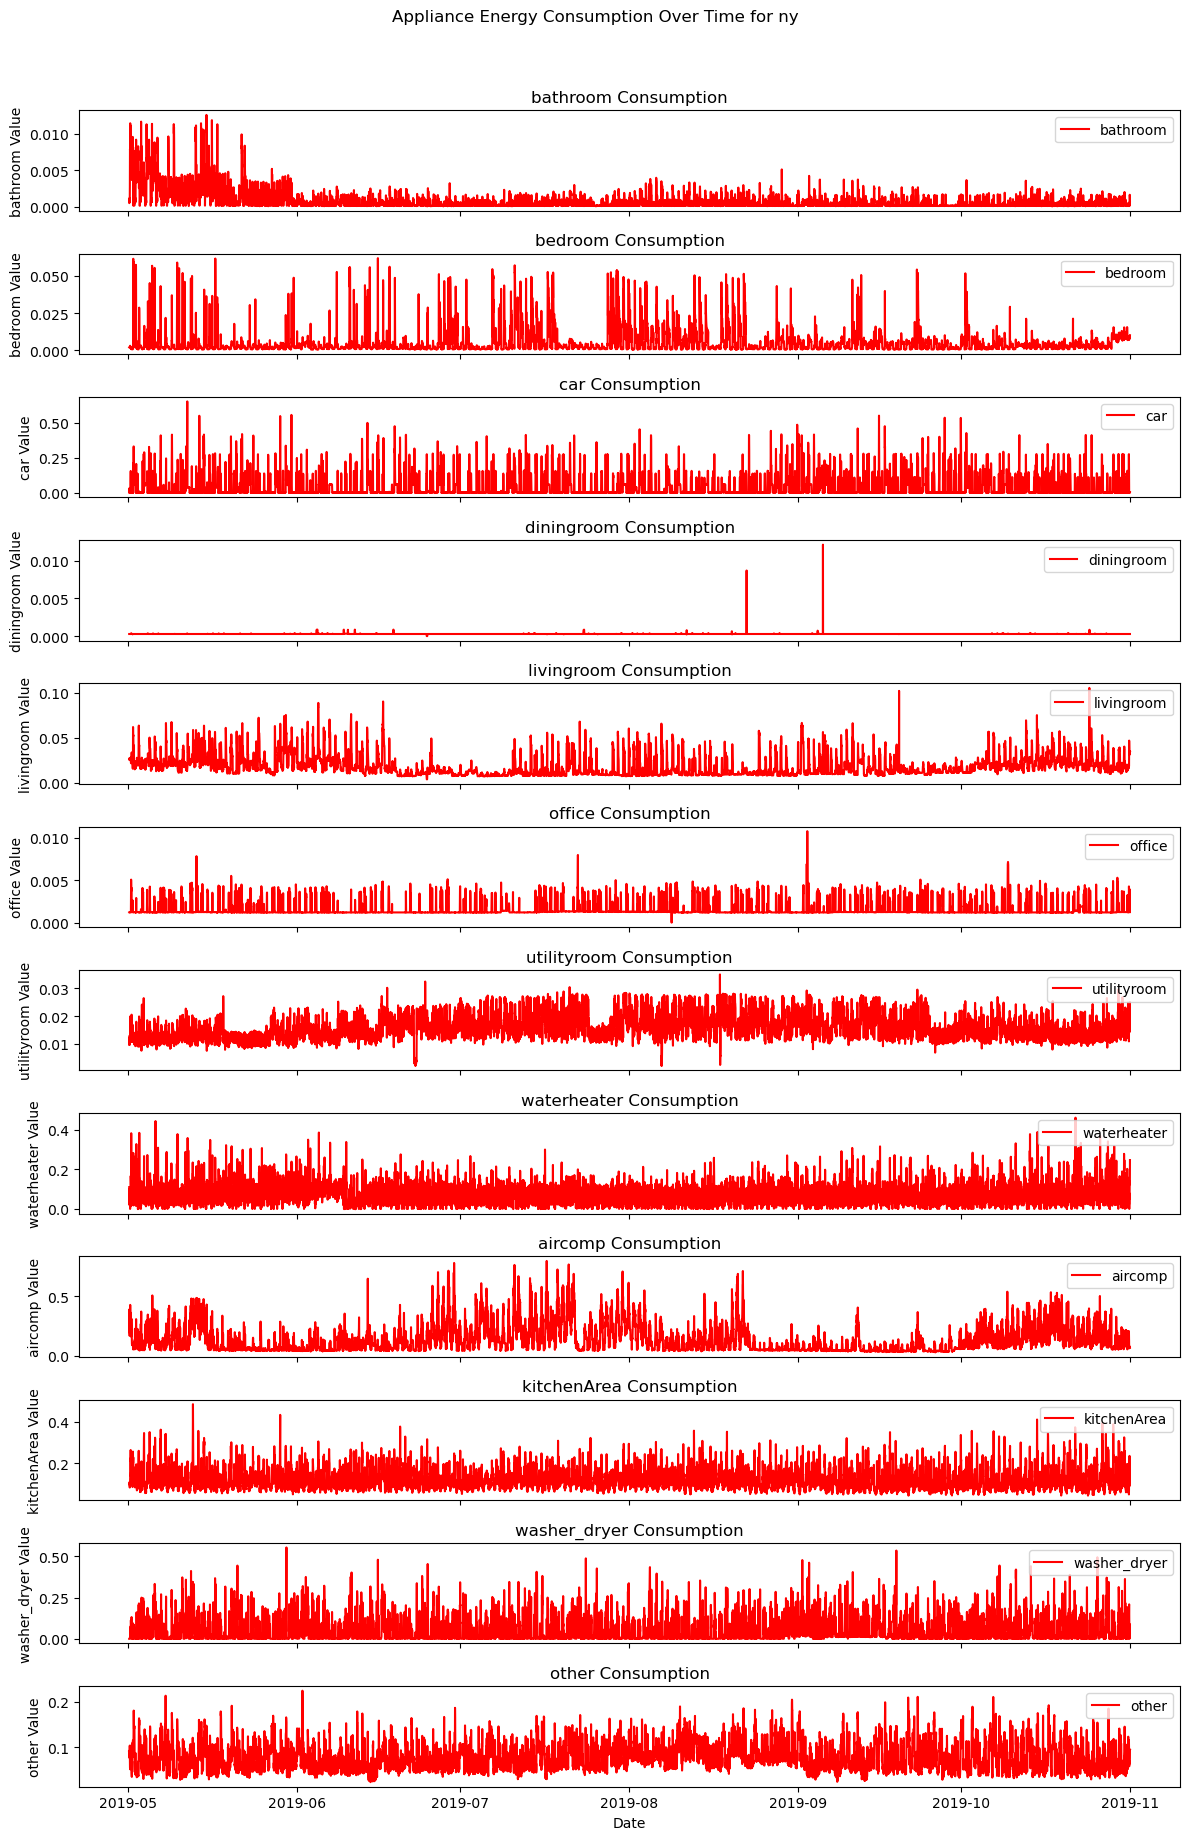

In [46]:
# Define the appliance columns you want to plot
appliance_cols = ['bathroom', 'bedroom', 'car', 'diningroom',
       'livingroom', 'office', 'utilityroom', 'waterheater', 'aircomp',
       'kitchenArea', 'washer_dryer', 'other'
       ]

# Loop through each city and plot the appliance data in separate subplots
for city in df['city'].unique():
    # Filter the DataFrame for the current city
    city_df = df[df['city'] == city]
    
    # Create subplots, one for each appliance column
    fig, axs = plt.subplots(len(appliance_cols), 1, figsize=(12, 1.5 * len(appliance_cols)), sharex=True)
    fig.suptitle(f'Appliance Energy Consumption Over Time for {city}', y=1.02)  # Main title for the city

    # Loop through each appliance column and plot on a separate subplot
    for i, col in enumerate(appliance_cols):
        axs[i].plot(city_df['date'], city_df[col], label=col, color='red')  # Customize color as desired
        axs[i].set_title(f'{col} Consumption')
        axs[i].set_ylabel(f'{col} Value')
        axs[i].legend(loc='upper right')
    
    # Set a common x-axis label for all subplots
    plt.xlabel('Date')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

### Trends - Heatmap

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_5243/2710653485.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = city_df.groupby('month')[appliance_cols].mean()


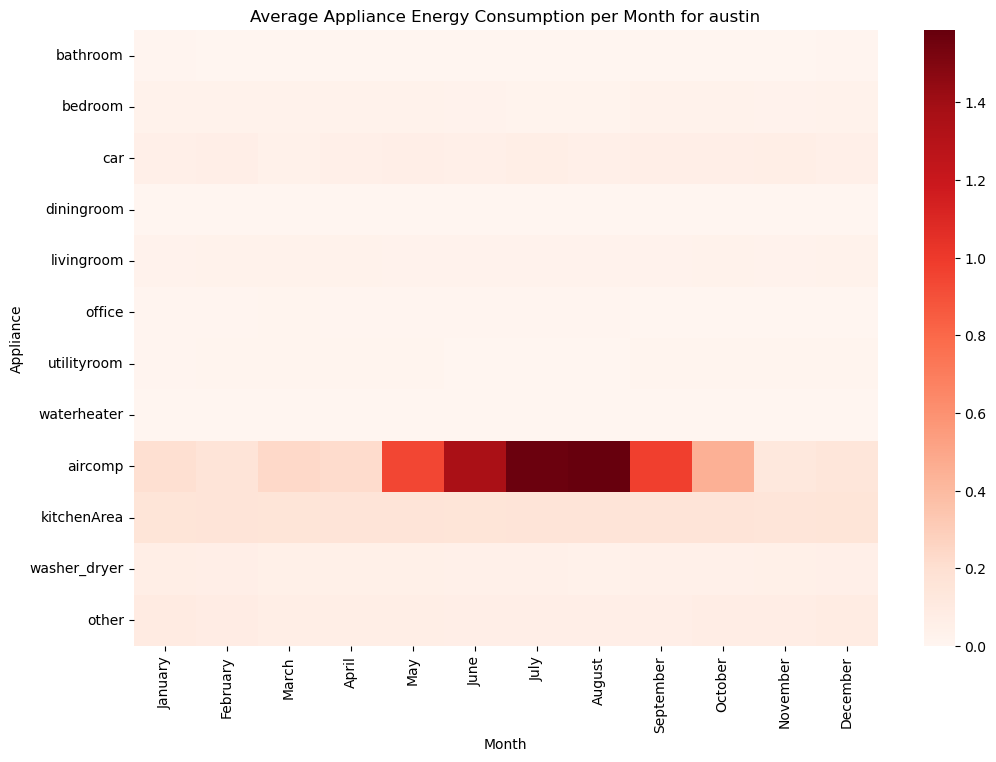

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_5243/2710653485.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = city_df.groupby('month')[appliance_cols].mean()


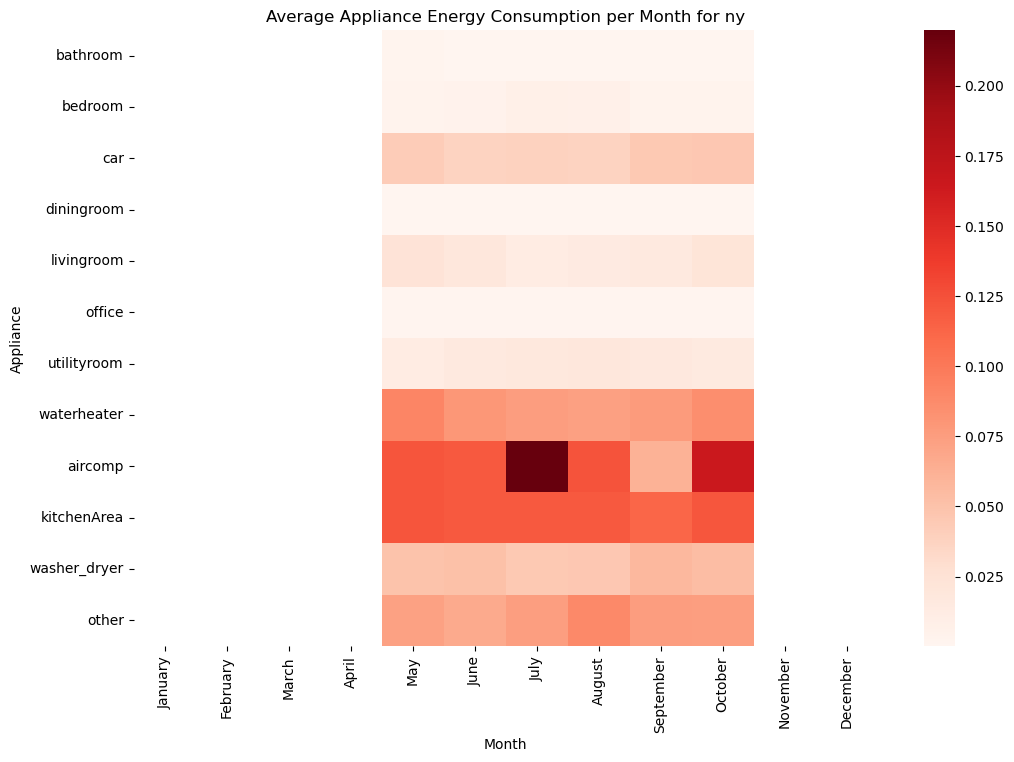

In [47]:
# Loop through each city to create the heatmap
for city in df['city'].unique():
    # Filter the DataFrame for the current city
    city_df = df[df['city'] == city]
    
    # Group by month and calculate the mean for each appliance
    df_heatmap = city_df.groupby('month')[appliance_cols].mean()
    
    # Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
    df_heatmap_t = df_heatmap.T

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

    # Add titles and labels
    plt.title(f'Average Appliance Energy Consumption per Month for {city}')
    plt.xlabel('Month')
    plt.ylabel('Appliance')

    # Show the plot
    plt.show()

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_5243/1659177013.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = city_df.groupby('day_name')[appliance_cols].mean()


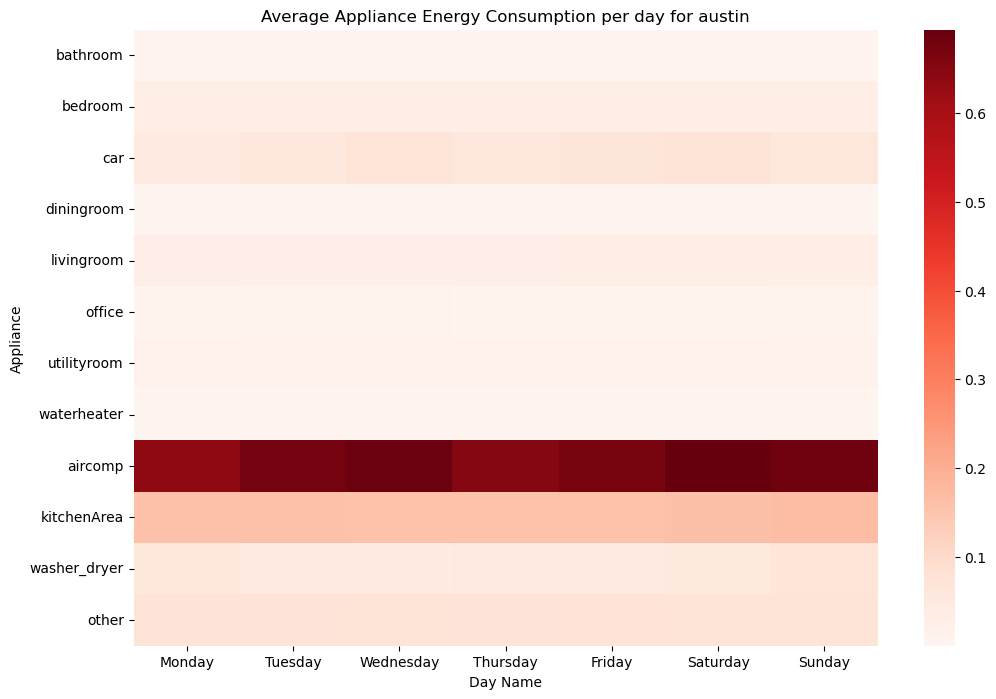

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_5243/1659177013.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = city_df.groupby('day_name')[appliance_cols].mean()


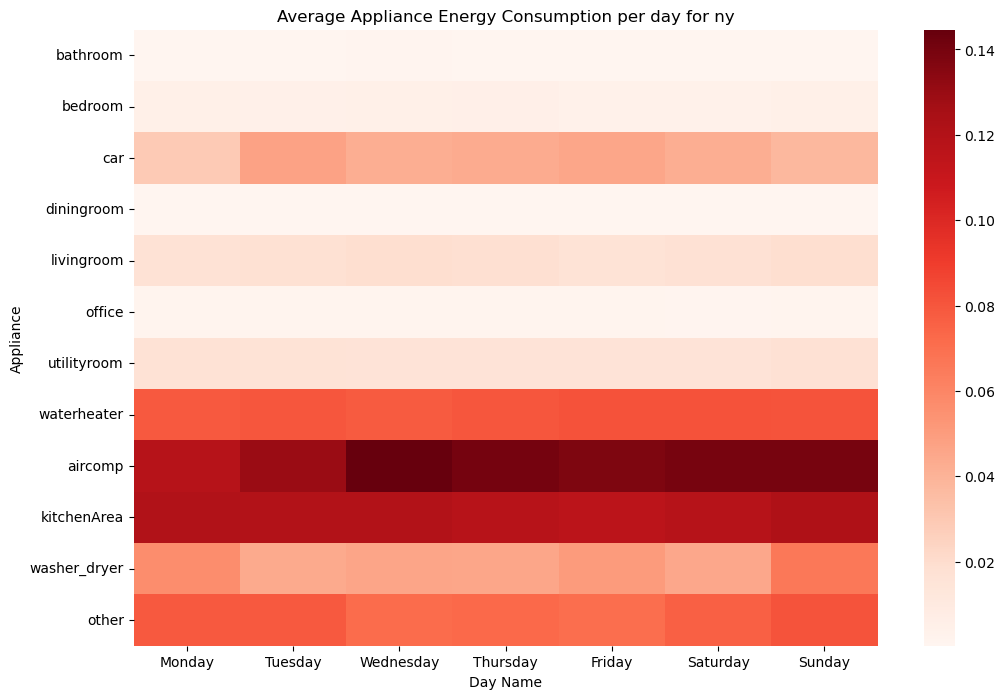

In [48]:
# Loop through each city to create the heatmap
for city in df['city'].unique():
    # Filter the DataFrame for the current city
    city_df = df[df['city'] == city]
    
    # Group by month and calculate the mean for each appliance
    df_heatmap = city_df.groupby('day_name')[appliance_cols].mean()
    
    # Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
    df_heatmap_t = df_heatmap.T

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

    # Add titles and labels
    plt.title(f'Average Appliance Energy Consumption per day for {city}')
    plt.xlabel('Day Name')
    plt.ylabel('Appliance')

    # Show the plot
    plt.show()

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_5243/3399063319.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = city_df.groupby('time_of_day')[appliance_cols].mean()


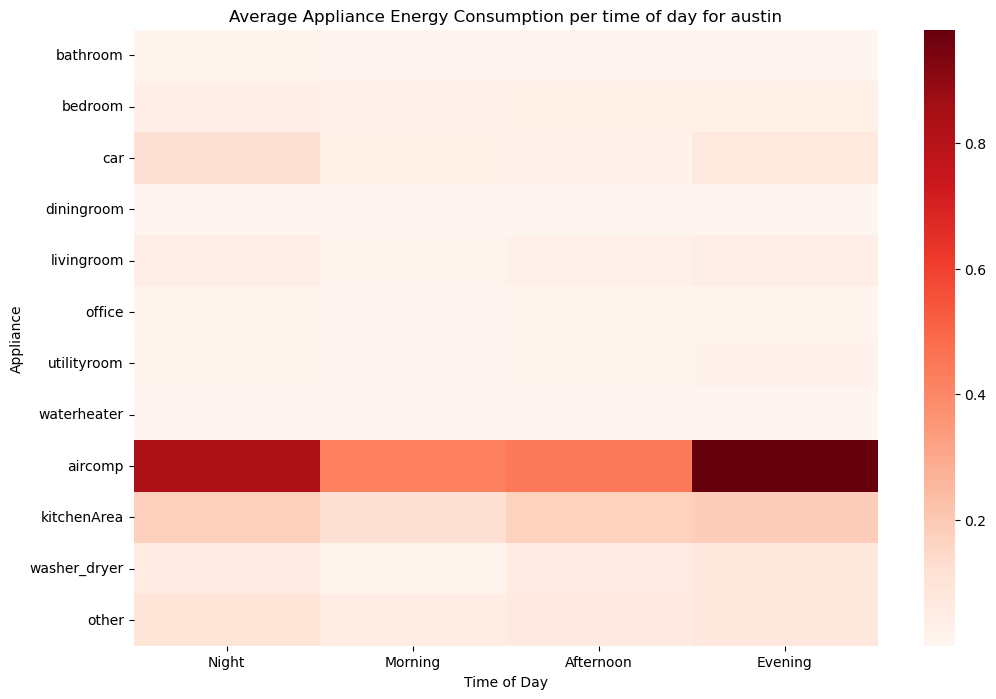

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_5243/3399063319.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = city_df.groupby('time_of_day')[appliance_cols].mean()


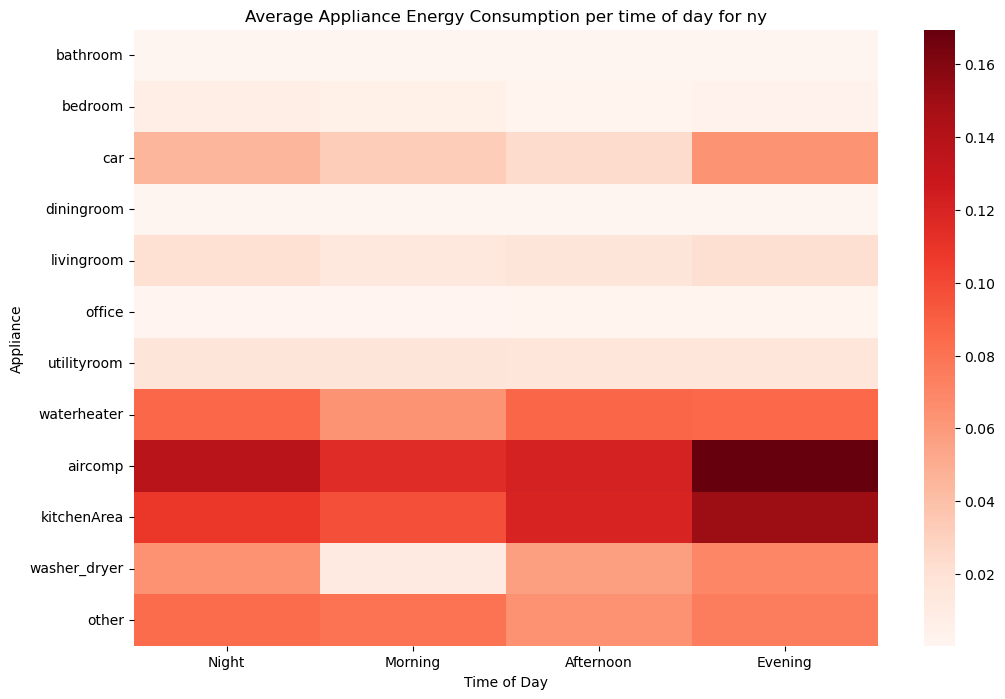

In [49]:
# Loop through each city to create the heatmap
for city in df['city'].unique():
    # Filter the DataFrame for the current city
    city_df = df[df['city'] == city]
    
    # Group by month and calculate the mean for each appliance
    df_heatmap = city_df.groupby('time_of_day')[appliance_cols].mean()
    
    # Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
    df_heatmap_t = df_heatmap.T

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

    # Add titles and labels
    plt.title(f'Average Appliance Energy Consumption per time of day for {city}')
    plt.xlabel('Time of Day')
    plt.ylabel('Appliance')

    # Show the plot
    plt.show()

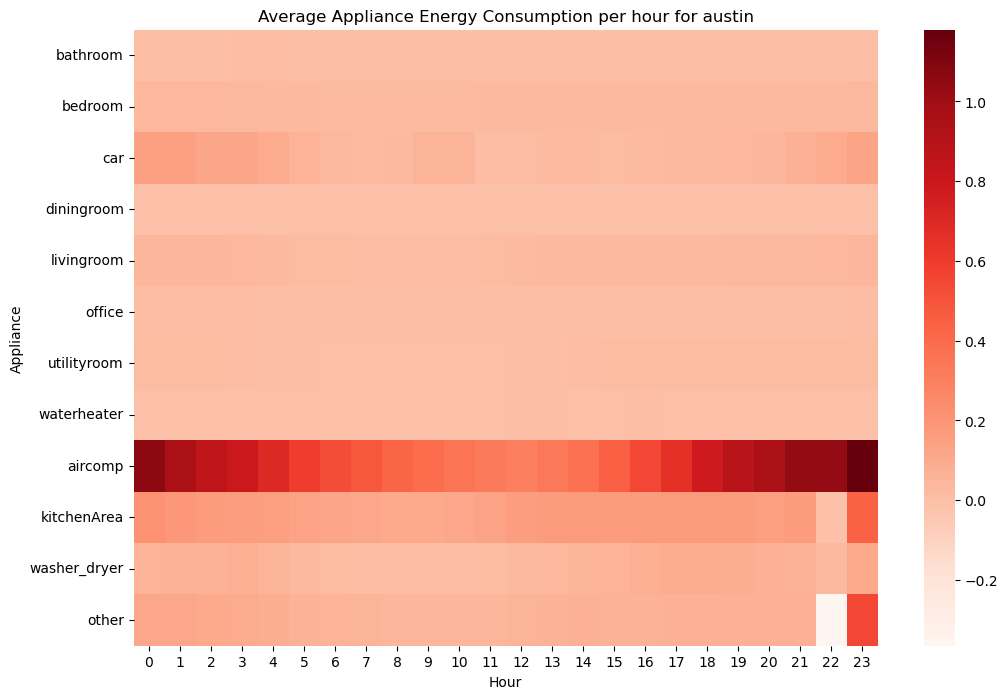

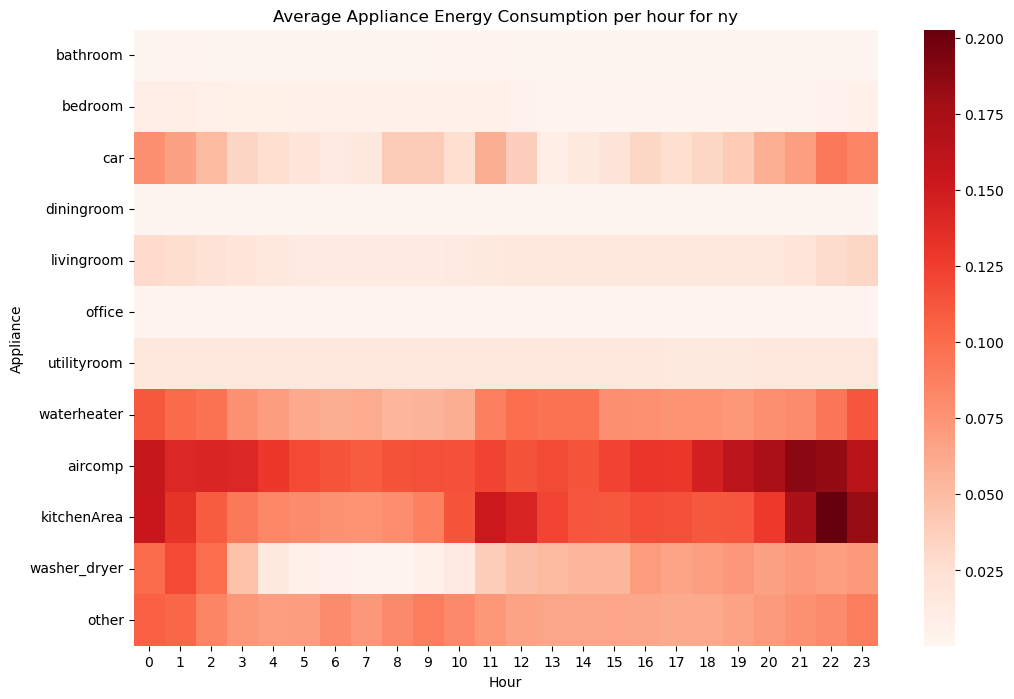

In [50]:
# Loop through each city to create the heatmap
for city in df['city'].unique():
    # Filter the DataFrame for the current city
    city_df = df[df['city'] == city]
    
    # Group by month and calculate the mean for each appliance
    df_heatmap = city_df.groupby('hour')[appliance_cols].mean()
    
    # Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
    df_heatmap_t = df_heatmap.T

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

    # Add titles and labels
    plt.title(f'Average Appliance Energy Consumption per hour for {city}')
    plt.xlabel('Hour')
    plt.ylabel('Appliance')

    # Show the plot
    plt.show()